# **DATA COLLECTION**

## Edit MainData (title.principals)

In [0]:
!wget https://datasets.imdbws.com/title.principals.tsv.gz
!gunzip title.principals.tsv.gz

!wget https://datasets.imdbws.com/name.basics.tsv.gz
!gunzip name.basics.tsv.gz

!wget https://datasets.imdbws.com/title.basics.tsv.gz
!gunzip title.basics.tsv.gz

In [0]:
import pandas as pd

In [0]:
mainData = pd.read_csv('title.principals.tsv', sep='\t', header=0)
nameData = pd.read_csv('name.basics.tsv', sep='\t', header=0)
titleData = pd.read_csv('title.basics.tsv', sep='\t', header=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
mainData = mainData.merge(titleData, on='tconst', how='left')

In [0]:
mainData = mainData[(mainData.titleType == "movie")]
mainData = mainData.merge(nameData, on='nconst', how='left')

In [0]:
mainData = mainData[(mainData.deathYear == '\\N')]

In [0]:
del mainData['job']
del mainData['endYear']
del mainData['isAdult']
del mainData['originalTitle']
del mainData['characters']
del mainData['primaryProfession']
del mainData['knownForTitles']
mainData

,tconst,ordering,nconst,category,titleType,primaryTitle,startYear,runtimeMinutes,genres,primaryName,birthYear,deathYear
11,tt0000335,1,nm1010955,actress,movie,Soldiers of the Cross,1900,\N,\N,Beatrice Day,\N,\N
12,tt0000335,2,nm1012612,actor,movie,Soldiers of the Cross,1900,\N,\N,Harold Graham,\N,\N
13,tt0000335,3,nm1011210,actor,movie,Soldiers of the Cross,1900,\N,\N,Mr. Graham,\N,\N
14,tt0000335,4,nm1012621,actor,movie,Soldiers of the Cross,1900,\N,\N,John Jones,\N,\N
19,tt0000502,1,nm0215752,actor,movie,Bohemios,1905,100,\N,Antonio del Pozo,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...
3830313,tt9916754,5,nm9272490,director,movie,Chico Albuquerque - Revelações,2013,49,\N,Angela Gurgel,\N,\N
3830314,tt9916754,6,nm8349149,director,movie,Chico Albuquerque - Revelações,2013,49,\N,Vinicius Augusto Bozzo,1985,\N
3830315,tt9916754,7,nm9272489,cinematographer,movie,Chico Albuquerque - Revelações,2013,49,\N,Marcelo Alves,\N,\N
3830316,tt9916754,8,nm10538638,cinematographer,movie,Chico Albuquerque - Revelações,2013,49,\N,Wellington Barros,\N,\N


In [0]:
### SAVE ###
#mainData.to_csv("/content/mainData.csv")

In [0]:
### READ ###
#mainData = pd.read_csv('mainData.csv', sep=',', header=0, index_col=0)
#del mainData['knownForTitles']
#mainData

In [0]:
# Replace miss data with 0 values.
mainData["startYear"] = mainData["startYear"].replace({"\\N": "0"})

## Edit NameData To Get Miss-Edges (name.basics)

**Note:** We didn't use this data, since some unnecessary datas came.

In [0]:
nameData = nameData[(nameData.deathYear == '\\N')]

In [0]:
nameData[['primaryProfession1','primaryProfession2','primaryProfession3']] = nameData['primaryProfession'].str.split("," ,expand=True)
del nameData['primaryProfession']

In [0]:
nameData = nameData[(nameData.primaryProfession1 == 'actor') | (nameData.primaryProfession1 == 'actress') | (nameData.primaryProfession2 == 'actor') | (nameData.primaryProfession2 == 'actress') | (nameData.primaryProfession3 == 'actor') | (nameData.primaryProfession3 == 'actress') ]

In [0]:
nameData = nameData[(nameData.knownForTitles != '\\N')]

nameData[['knownForTitles1','knownForTitles2','knownForTitles3','knownForTitles4','knownForTitles5','knownForTitles6','knownForTitles7','knownForTitles8']] = nameData['knownForTitles'].str.split("," ,expand=True)
del nameData['knownForTitles']
nameData

In [0]:
lostList = []

In [0]:
# Suan buradan diziler tv showlari geldi. O yuzden cok mantikli olmadi bunun olmasi!!!!!!!

for index, row in nameData.iterrows():
    if not (row['knownForTitles1'] == None):
      lostList.append(row['knownForTitles1'] + "," + row['nconst'])

    if not (row['knownForTitles2'] == None):
      lostList.append(row['knownForTitles2'] + "," + row['nconst'])

    if not (row['knownForTitles3'] == None):
      lostList.append(row['knownForTitles3'] + "," + row['nconst'])
      
    if not (row['knownForTitles4'] == None):
      lostList.append(row['knownForTitles4'] + "," + row['nconst'])

    if not (row['knownForTitles5'] == None):
      lostList.append(row['knownForTitles5'] + "," + row['nconst'])

    if not (row['knownForTitles6'] == None):
      lostList.append(row['knownForTitles6'] + "," + row['nconst'])
    
    if not (row['knownForTitles7'] == None):
      lostList.append(row['knownForTitles7'] + "," + row['nconst'])

    if not (row['knownForTitles8'] == None):
      lostList.append(row['knownForTitles8'] + "," + row['nconst'])

In [0]:
with open('lost_data.txt', 'w') as f:
    for item in lostList:
        f.write("%s\n" % item)

In [0]:
lostData = pd.read_csv('lost_data.txt', sep=',', header=None)
lostData.columns = ['tconst', 'nconst']

In [0]:
lostData = lostData.merge(titleData, on='tconst', how='left')

In [0]:
lostData = lostData[(lostData.titleType == 'movie')]
lostData = lostData.merge(crewData, on='tconst', how='left')
lostData

In [0]:
for index, row in lostData.iterrows():
    if row['nconst'] in row['directors'].split(","):
      lostData.drop(lostData.index[[index]])

## Edit CrewData To Get Crews Easier (title.crew)

**Note:** There were some problems with it, so we didn't use this data.

In [0]:
!wget https://datasets.imdbws.com/title.crew.tsv.gz
!gunzip title.crew.tsv.gz

In [0]:
crewData = pd.read_csv('title.crew.tsv', sep='\t', header=0)
del crewData["writers"]

In [0]:
crewData

In [0]:
crewData = crewData.merge(nameData, on='nconst', how='left')

## Split MainData To Train, Val and Test

**Note:** In this section we created each dataset. This is important to split all mainData above.

In [0]:
cast_director_data = mainData[(mainData.category == "actor") | (mainData.category == "actress") | (mainData.category == "director")]
#directorsData = mainData[(mainData.category == "director")]

len(cast_director_data)

1642424

In [0]:
cast_director_data = cast_director_data[(cast_director_data.startYear.astype(int) >= 2000)]
len(cast_director_data)

875079

In [0]:
trainData                = cast_director_data[(cast_director_data.startYear.astype(int) <= 2009) & (cast_director_data.startYear.astype(int) >= 2000)]
trainDependentSeenData   = cast_director_data[(cast_director_data.startYear.astype(int) <= 2014) & (cast_director_data.startYear.astype(int) >= 2010)]
testData                 = cast_director_data[(cast_director_data.startYear.astype(int) <= 2014) & (cast_director_data.startYear.astype(int) >= 2005)]
testDependentSeenData    = cast_director_data[(cast_director_data.startYear.astype(int) <= 2019) & (cast_director_data.startYear.astype(int) >= 2015)]

### Create List For Each Dataset

**Note:** Change "trainData" to get edgesData for each dataset.

In [0]:
groupData = trainData.groupby('tconst')

listGroupData = list(groupData.groups)

In [0]:
edgesList = []

In [0]:
for eachMovie in listGroupData:
  oneGroup = groupData.get_group(eachMovie)
  if (oneGroup.category.str.contains(pat="actor").any() or oneGroup.category.str.contains(pat="actress").any()):
    if ((oneGroup.category.str.contains(pat="director").any())):
      for personIndex1, personRow1 in oneGroup.iterrows():
        checkValue1 = personRow1.category
        if(checkValue1 == "director"):
          for personIndex2, personRow2 in oneGroup.iterrows():
            checkValue2 = personRow2.category
            if(checkValue2 == "actor" or checkValue2 == "actress"):
              edgesList.append("d_" + personRow1.nconst + ",c_" + personRow2.nconst)

print(len(edgesList))

304661


In [0]:
with open('edgesdata_test_seen_network_links.txt', 'w') as f:
    for item in edgesList:
        f.write("%s\n" % item)

In [0]:
!cp "/content/edgesdata_test_seen_network_links.txt" "/content/drive/My Drive/SNA_Edges/Dependent Links"

### Check True Prediction List Gathered From Models

**Note:** This is for last step to check predictions from results.

In [0]:
true_pred_list = pd.read_csv('/content/true_pred_list.txt', sep=',', header=None)

In [0]:
true_pred_list.columns = ["director", "movie_star"]
true_pred_list

In [0]:
true_pred_list.Director = true_pred_list.Director.replace({'nm':'d_nm'}, regex=True)
true_pred_list.Cast     = true_pred_list.Cast.replace({'nm':'c_nm'}, regex=True)

In [0]:
true_pred_list.merge(counted_val, on=['director', 'movie_star'], how='left').sort_values(by="weight").iloc[32120:32131]

# **DATA PROCCESS**

## Necessary Libraries

In [0]:
!pip install node2vec

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import networkx as nx
from collections import Counter
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import gensim

## Create Network

**Note:** You need to change "counted_train" value to create network for different datasets like train dependent, test dependent, train seen network...

In [3]:
#Train
edgesData_train = pd.read_csv('/content/drive/My Drive/SNA_Edges/Dependent Links/general_network_links.txt', sep=',', header=None)
edgesData_train.columns = ["director", "movie_star"]

counted_train = edgesData_train.groupby(edgesData_train.columns.tolist()).size().reset_index().\
    rename(columns={0:'weight'})

counted_train = counted_train.sort_values(by="weight")

print("Train: " + str(len(counted_train)))

Train: 591723 - Val: 127348 - Test: 147767
866838


**Note:** We created bipartite network.

In [0]:
left_list = counted_train.director.to_list()
right_list = counted_train.movie_star.to_list()
weight_list = counted_train.weight.to_list()

with open('edgelist.txt', 'w') as f:
    for item1, item2, item3 in zip(left_list, right_list, weight_list):
        f.write(item1 + " " + item2 + " " + str(item3) + "\n")

with open('left.txt', 'w') as f:
    for item in left_list:
        f.write("%s\n" % item)

with open('right.txt', 'w') as f:
    for item in right_list:
        f.write("%s\n" % item)

In [5]:
left = [line.rstrip('\n') for line in open("left.txt")]
right = [line.rstrip('\n') for line in open("right.txt")]

left = list(set(left))
right = list(set(right))

print("Right: " + str(len(right)) + " Left: " + str(len(left)))

Right: 311686 Left: 91425


In [0]:
edge_list = [line.rstrip('\n') for line in open("edgelist.txt")]

a_list = []

for elem in edge_list:
  a_list.append(tuple(elem.split(" ")))

In [7]:
graph = nx.Graph()
graph.add_nodes_from(right, bipartite=0)
graph.add_nodes_from(left, bipartite=1)

[graph.add_edge(x, y, weight=int(z)) for x, y, z in a_list]

print(nx.info(graph))
print("This network bipartite and weighted?")
print(nx.is_bipartite(graph))
print(nx.is_weighted(graph))

Name: 
Type: Graph
Number of nodes: 403111
Number of edges: 591723
Average degree:   2.9358
This network bipartite and weighted?
True
True


#### Select randomly edges

**Note:** Select randomly false edges, for creating dataset for models!!!

In [0]:
graph_nodes = []
gen_graph_links = []

In [0]:
counter = 0
while(counter < 100000):
  graph_nodes = []
  right_elem = random.choice(right)
  left_elem = random.choice(left)
  if(graph.has_edge(left_elem, right_elem) == False):
    graph_nodes.append(right_elem)
    graph_nodes.append(left_elem)
    if not graph_nodes in gen_graph_links:
        counter = counter + 1
        gen_graph_links.append(graph_nodes)

In [0]:
with open('gen_graph_links2.txt', 'w') as f:
    for item in gen_graph_links:
        f.write("%s\n" % item)

In [0]:
!cp "/content/gen_graph_links2.txt" "/content/drive/My Drive/SNA_Edges/Dependent Links/"

#### Descriptive Info

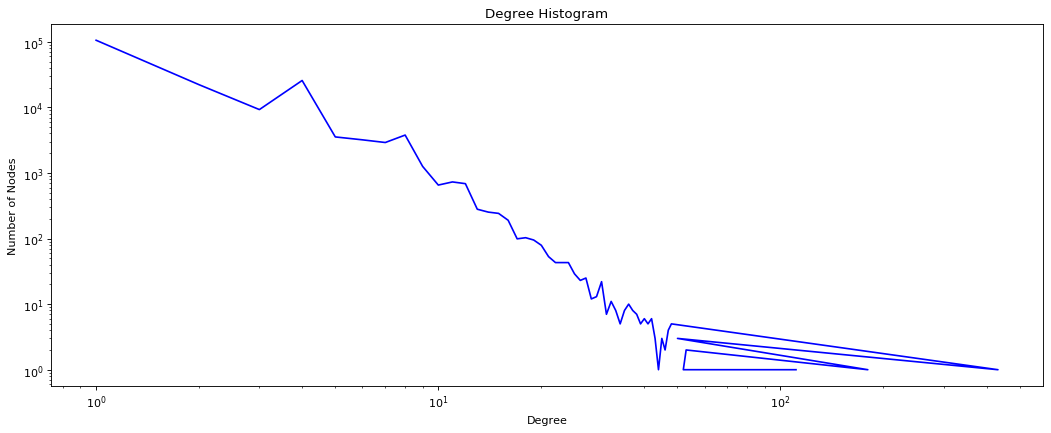

In [0]:
## degree distribution or degree histogram
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

def plot_degree_dist(graph):
    degrees = [val for (node, val) in graph.degree()]
    all_degrees=list(degrees)
    unique_degrees=list(set(all_degrees))

    count_degrees=[]
    for i in unique_degrees:
      x = all_degrees.count(i)
      count_degrees.append(x)
    plt.loglog(unique_degrees, count_degrees, color="blue")
    plt.show()
   
plt.title("Degree Histogram")
plt.ylabel("Number of Nodes")    
plt.xlabel("Degree")

plot_degree_dist(graph)

In [0]:
### If you want to get visualization of graph, please run it. ###

#import networkx as nx
#from collections import Counter
#import matplotlib.pyplot as plt

#sp = nx.spring_layout(graph)
#plt.axis("off")
#plt.figure(figsize=(100,100))
#nx.draw_networkx(graph, pos=sp, with_labels=False, node_size=5)
#plt.savefig("plt.pdf")
#nx.write_edgelist(graph, "edgesData.edgelist", data=['weight'])

#### Projection of general graph

In [8]:
graph_proj = nx.Graph()

graph_proj.add_edges_from(list(bipartite.weighted_projected_graph(graph, nodes=left).edges(data=True)), data=(('weight', float),))

print(nx.info(graph_proj))

Name: 
Type: Graph
Number of nodes: 75352
Number of edges: 1315442
Average degree:  34.9146


In [9]:
pgr = nx.pagerank(graph_proj)
print(str(pgr))

{'d_nm1152175': 2.3927887075769485e-05, 'd_nm0128452': 2.0085601740351742e-05, 'd_nm2130235': 1.275298440532958e-05, 'd_nm0770961': 4.377378182726457e-05, 'd_nm0065449': 7.110694519572882e-05, 'd_nm0001676': 9.705323334378207e-06, 'd_nm0662530': 3.1382409586107874e-05, 'd_nm0115500': 4.138301020026059e-05, 'd_nm0637458': 9.350921084336995e-06, 'd_nm0013041': 3.2766321982580034e-05, 'd_nm0420746': 2.2913798828612896e-05, 'd_nm0001469': 8.216818976711419e-05, 'd_nm0177552': 3.451514789064978e-05, 'd_nm0881351': 9.017433026152405e-06, 'd_nm0013878': 9.706888857446146e-06, 'd_nm1636690': 1.4057284049607262e-05, 'd_nm0219136': 7.10870535496499e-05, 'd_nm0072354': 3.1207668942831434e-05, 'd_nm0402317': 1.7189741119908418e-05, 'd_nm1267084': 1.7334359854271656e-05, 'd_nm0000115': 1.9515901366756962e-05, 'd_nm2131687': 1.704888055318226e-05, 'd_nm0494557': 2.7937416518550607e-05, 'd_nm1788079': 6.8865331087778425e-06, 'd_nm0504642': 9.389100934039857e-05, 'd_nm0470443': 6.022181667001295e-05, 

In [0]:
btw = nx.betweenness_centrality(graph_proj)
print(str(btw))

In [0]:
cls = nx.closeness_centrality(graph_proj)
print(str(cls))

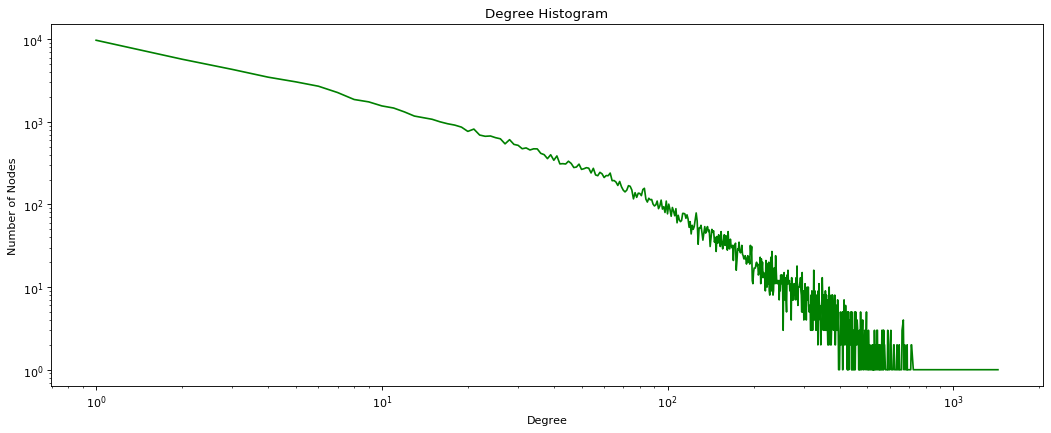

In [0]:
## degree distribution or degree histogram
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 6), dpi=80, facecolor='w', edgecolor='k')

def plot_degree_dist(graph):
    degrees = [val for (node, val) in graph.degree()]
    all_degrees=list(degrees)
    unique_degrees=list(set(all_degrees))

    count_degrees=[]
    for i in unique_degrees:
      x = all_degrees.count(i)
      count_degrees.append(x)
    plt.loglog(unique_degrees, count_degrees, color="green")
    plt.show()
   
plt.title("Degree Histogram")
plt.ylabel("Number of Nodes")    
plt.xlabel("Degree")

plot_degree_dist(graph_proj)

## Create Node and Edge Embeddings and Model by Node2Vec

In [0]:
!mkdir emb
!mkdir result

In [0]:
EMBEDDING_FILENAME = 'emb/embeddings.emb'
EMBEDDING_MODEL_FILENAME = 'emb/embeddings.model'
EDGES_EMBEDDING_FILENAME = "result/IMDB.txt"

In [0]:
from node2vec import Node2Vec

# Precompute probabilities and generate walks - **ON WINDOWS ONLY WORKS WITH workers=1**
node2vec = Node2Vec(graph, dimensions=12, walk_length=40, num_walks=6, workers=1, weight_key="weight")  # Use temp_folder for big graphs

Generating walks (CPU: 1): 100%|██████████| 6/6 [17:45<00:00, 187.46s/it]


In [0]:
# Embed nodes
model = node2vec.fit(window=10, min_count=1, batch_words=4)  # Any keywords acceptable by gensim.Word2Vec can be passed, `diemnsions` and `workers` are automatically passed (from the Node2Vec constructor)

In [0]:
# Save embeddings for later use
model.wv.save_word2vec_format(EMBEDDING_FILENAME)

# Save model for later use
model.save(EMBEDDING_MODEL_FILENAME)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
!cp "emb/embeddings.emb" "/content/drive/My Drive/SNA_Edges/New3"

In [0]:
!cp "emb/embeddings.model" "/content/drive/My Drive/SNA_Edges/New3"

**Note:** Now, you can contunie with edit_embeddings notebook!!!

**Note:** In this step, we get the similar nodes to apply logistic regression. Now, we use different techniques.

In [0]:
learning_list = []

for director in left:
  for inner_elem in model.wv.most_similar(director):
    if("c_" in inner_elem[0]):
      inner_list = []
      inner_list.append(director)
      inner_list.append(inner_elem[0])
      inner_list.append(inner_elem[1])
      inner_list.append(graph.has_edge(director, inner_elem[0]))
      learning_list.append(inner_list)

for cast in right:
  for inner_elem in model.wv.most_similar(cast):
    if("d_" in inner_elem[0]):
      inner_list = []
      inner_list.append(inner_elem[0])
      inner_list.append(cast)
      inner_list.append(inner_elem[1])
      inner_list.append(graph.has_edge(cast, inner_elem[0]))
      if not inner_list in learning_list:
        learning_list.append(inner_list)

learning_list

In [0]:
with open('prediction_train.txt', 'w') as f:
    for item in learning_list:
        f.write("%s\n" % item)

In [0]:
!cp "prediction_train.txt" "/content/drive/My Drive/SNA_Edges/dim_8"

**Note:** In this step, we try to get edge embedding, but it was too large.

In [0]:
# Load saved embeddings in Google Drive.
model_train = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/SNA_Edges/Train/embeddings.emb", binary=False)
model_val = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/SNA_Edges/Val/embeddings.emb", binary=False)
model_test = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/My Drive/SNA_Edges/Test/embeddings.emb", binary=False)

In [0]:
EDGES_EMBEDDING_FILENAME_TRAIN = "result/IMDB_TRAIN.txt"
EDGES_EMBEDDING_FILENAME_VAL   = "result/IMDB_VAL.txt"
EDGES_EMBEDDING_FILENAME_TEST  = "result/IMDB_TEST.txt"

In [0]:
# Embed edges using Hadamard method
from node2vec.edges import HadamardEmbedder

In [0]:
edges_embs_train = HadamardEmbedder(keyed_vectors=model_train.wv)
edges_embs_val   = HadamardEmbedder(keyed_vectors=model_val.wv)
edges_embs_test  = HadamardEmbedder(keyed_vectors=model_test.wv)

# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv_train   = edges_embs_train.as_keyed_vectors()
edges_kv_val     = edges_embs_val.as_keyed_vectors()
edges_kv_test    = edges_embs_test.as_keyed_vectors()

# Save embeddings for later use
edges_kv_train.save_word2vec_format(EDGES_EMBEDDING_FILENAME_TRAIN)
edges_kv_val.save_word2vec_format(EDGES_EMBEDDING_FILENAME_VAL)
edges_kv_test.save_word2vec_format(EDGES_EMBEDDING_FILENAME_TEST)

Note: Contunie with model

In [0]:
from node2vec.edges import HadamardEmbedder

edges_embs = HadamardEmbedder(keyed_vectors=model.wv)

In [0]:
# Get all edges in a separate KeyedVectors instance - use with caution could be huge for big networks
edges_kv = edges_embs.as_keyed_vectors()
# Save embeddings for later use
edges_kv.save_word2vec_format(EDGES_EMBEDDING_FILENAME)

Generating edge features:   1%|          | 63566326/9821922246.0 [05:48<15:13:38, 178010.67it/s]

In [0]:
# Get most similar edges for below edge.
edges_kv.most_similar(str(('nm1239705', 'nm3905109')))